# Descriptive and Inferencial Statistics: 
- **Descriptive statistics:** Description of the info that we are using.
    
- **Inferencial statistics:** Infere the data that is unknown to us, for example, height of man in population got from a sample.

<img src="images/static/descriptive-statistics-and-inferential-statistics.jpg",width=350, height=350>

In [1]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Creating a Pandas DataFrame to analyze 
df = pd.DataFrame(dict(id=range(60), age = np.random.randint(18,31, size = 60)))

In [3]:
# Preview DataFrame 
df.head()

,age,id
0,30,0
1,23,1
2,30,2
3,30,3
4,20,4


In [4]:
# Calculating indicators for provided data
print(f'The MEAN for the age column in provided data is: {np.mean(df["age"])}')
print(f'The MEDIAN for the age column in provided data is: {np.median(df["age"])}')
# print(f'The MODE for the age column in provided data is: {mode(df["age"])}')
print(f'The RANGE for the age column in provided data is: {np.max(df["age"]) - np.min(df["age"]) }')


# Q1
    # Q1
    # first quartile
    # lower quartile
    # 25th percentile
    # splits off the lowest 25% of data from the highest 75%
Q1 = np.percentile(df["age"], 25)

# Q2
    # second quartile
    # median
    # 50th percentile
    # cuts data set in half
Q2 = np.percentile(df["age"], 50)

# Q3
    # third quartile
    # upper quartile
    # 75th percentile
    # splits off the highest 25% of data from the lowest 75%
Q3 = np.percentile(df["age"], 75)

print(f'The VARIANCE for the age column in provided data is: {np.var(df["age"])}')
print(f'The STD DEV for the age column in provided data is: {np.std(df["age"])}')
print(f'The IQR for the age column in provided data is: {Q3-Q1}')

The MEAN for the age column in provided data is: 23.733333333333334
The MEDIAN for the age column in provided data is: 23.0
The RANGE for the age column in provided data is: 12
The VARIANCE for the age column in provided data is: 15.96222222222222
The STD DEV for the age column in provided data is: 3.9952749870593665
The IQR for the age column in provided data is: 7.0


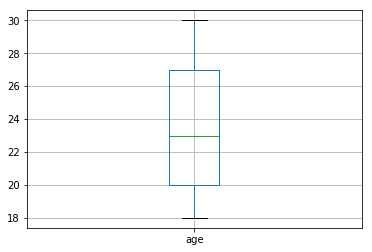

In [5]:
_= df.boxplot(column = "age", return_type = 'axes')

As a reference: 

<img src="images/static/boxplot-labels.png",width=350, align = 'center'>

##  Skewness:
In probability theory and statistics, skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. The skewness value can be positive or negative, or undefined.
    
## Kurtosis:
La curtosis de una variable estadística/aleatoria es una característica de forma de su distribución de frecuencias/probabilidad.

Según su concepción clásica, una curtosis grande implica una mayor concentración de valores de la variable tanto muy cerca de la media de la distribución (pico) como muy lejos de ella (colas), al tiempo que existe una relativamente menor frecuencia de valores intermedios. Esto explica una forma de la distribución de frecuencias/probabilidad con colas más gruesas, con un centro más apuntado y una menor proporción de valores intermedios entre el pico y colas.

<img src="images/static/Negative_and_positive_skew_diagrams.png", width=350>
<img src="images/static/KBQLN.jpg", width=350>

In [6]:
swekeness = df["age"].skew()
kurtosis = df["age"].kurt()

print(f'The SKEWENESS for the age column in provided data is: {swekeness}')
print(f'The KURTOIS for the age column in provided data is: {kurtosis}')

The SKEWENESS for the age column in provided data is: 0.10008495207760866
The KURTOIS for the age column in provided data is: -1.370912791924127


## Inferencial Statistics:

- Infers **properties of population**, for example, by testing hypothesis and deriving estimates.
    
- Infere the data that is unknown to us, for example, height of man in population got from a sample.

In [7]:
# Lets take random subsets of samples from population data
np.random.seed(10)

# Lets create an additional population with 1000 data points
population = np.random.randint(10,20,1000)

# Lets create an empty array of means
estimates = []

for i in range(200):
    samples = np.random.choice(population, 100)
    estimates.append(samples.mean())

In [8]:
# Calculating the mean
print(np.mean(population))

14.565


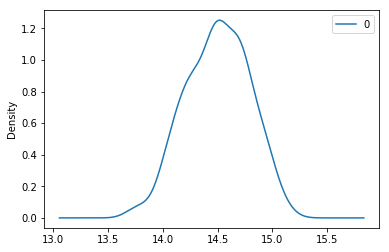

In [9]:
# EDA for estimates
_= pd.DataFrame(estimates).plot(kind='density')

## Confidence intervals:
- Par o varios pares de números entre los cuales se estima que estará cierto valor desconocido con una determinada probabilidad de acierto. Formalmente, estos números determinan un intervalo, que se calcula a partir de datos de una muestra, y el valor desconocido es un parámetro poblacional. La probabilidad de éxito en la estimación se representa con 1 - α y se denomina nivel de confianza. En estas circunstancias, α es el llamado error aleatorio o nivel de significación, esto es, una medida de las posibilidades de fallar en la estimación mediante tal intervalo.
   
- It gives us an **upper and lower limit** where 95% of our data will be available.

<img src="images/static/Margarinefilling.png",width=350>

## Margin of error:
The margin of error is a statistic expressing the **amount of random sampling error in a survey's results.** The larger the margin of error, the less confidence one should have that the poll's reported results are close to the "true" figures; that is, the figures for the whole population. Margin of error is positive whenever a population is incompletely sampled and the outcome measure has positive variance (that is, it varies).

<img src="images/static/Marginoferror.PNG", width=350>

In [10]:
# Import scipy stats in order to calculate critical z and t values 
import scipy.stats as stats

# Calculating z and t critical value
z_critical = stats.norm.ppf(q = 0.975)
t_critical = z_critical = stats.t.ppf(q = 0.975, df = 24)

In [11]:
# Calculating margin of errors based on critical values
margin_of_error = z_critical * (np.std(estimates)/np.sqrt(len(estimates)))

In [12]:
# Calculating confidence intervals
lower_bound = np.mean(estimates) - margin_of_error
upper_bound = np.mean(estimates) + margin_of_error

In [13]:
# Preview results
print(f'LOWER bound for confidence interval: {lower_bound}')
print(f'UPPER bound for confidence interval: {upper_bound}')

LOWER bound for confidence interval: 14.458326002884847
UPPER bound for confidence interval: 14.54137399711515
